<a href="https://colab.research.google.com/github/vicperotti/BANA780/blob/main/simplest_SKLEARN_Wine_Prediction_model_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Identify goals- is this classification, regression, clustering?

In [1]:
#source: https://elitedatascience.com/python-machine-learning-tutorial-scikit-learn

# 2. Import libraries and modules
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# 3. Load red wine data.
dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
y = data.quality
X = data.drop('quality', axis=1) # axis 1 refers to a column rather than a row

# Now try a new  model!
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [3]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,cross_val_predict

In [6]:
# 3. Declare data preprocessing steps
# standardscaler creates normalized variables for each column
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

pipeline = make_pipeline(preprocessing.StandardScaler(),
                         RandomForestRegressor(n_estimators=100))

In [7]:
# 3a. Declare hyperparameters to tune
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [10]:
%timeit
clf = RandomizedSearchCV(pipeline, hyperparameters, cv=10)

clf.fit(X, y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]),
                   param_distributions={'randomforestregressor__max_depth': [None,
                                                                             5,
                                                                             3,
                                                                             1],
                                        'randomforestregressor__max_features': ['auto',
                                                                                'sqrt',
                                                                                'log2']})

In [12]:
clf.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'log2'}

In [23]:
clf.best_estimator_.named_steps

{'randomforestregressor': RandomForestRegressor(max_features='log2'),
 'standardscaler': StandardScaler()}

In [11]:
# 6. Evaluate model pipeline on test data
pred = clf.predict(X)
print(clf.score(X,y))
print (r2_score(y, pred))
print (mean_squared_error(y, pred))

0.9334649569556811
0.9334649569556811
0.04336491557223264


In [ ]:
# 7. Find important features

In [19]:
#this syntax is really complex because of the pipeline!
featimparray = clf.best_estimator_.named_steps['randomforestregressor'].feature_importances_
 
print(featimparray)

[0.06539445 0.13274391 0.07096451 0.05821989 0.07185632 0.05287153
 0.08056937 0.08643428 0.05906712 0.13448435 0.18739426]


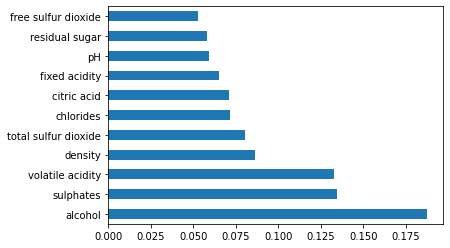

In [21]:
%matplotlib inline
feat_importances = pd.Series(featimparray, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')